In [24]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import random
%matplotlib qt

In [25]:
def interp2d_interleave(z,n):
    '''performs linear interpolation on a grid

    all points are interpolated in one step not recursively

    Parameters
    ----------
    z : 2d array (M,N)
    n : int
        number of points interpolated

    Returns
    -------
    zi : 2d array ((M-1)*n+M, (N-1)*n+N)
        original and linear interpolated values

    '''
    frac = np.atleast_2d(np.arange(0,n+1)/(1.0+n)).T
    zi1 = np.kron(z[:,:-1],np.ones(len(frac))) + np.kron(np.diff(z),frac.T)
    zi1 = np.hstack((zi1,z[:,-1:]))
    zi2 = np.kron(zi1.T[:,:-1],np.ones(len(frac))) + np.kron(np.diff(zi1.T),frac.T)
    zi2 = np.hstack((zi2,zi1.T[:,-1:]))
    return zi2.T

def interp2d_interleave_recursive(z,n):
    '''interpolates by recursively interleaving n times
    '''
    zi = z.copy()
    for ii in range(1,n+1):
        zi = interp2d_interleave(zi,1)
    return zi

def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]


In [26]:
terrain = np.zeros((2, 2))
randmap = 0.1 * np.random.randn(len(terrain[0, :]), len(terrain[0, :]));
terrain
#np.ones(terrain.shape())

array([[0., 0.],
       [0., 0.]])

In [27]:
def generateGround(i, c):
    terrain = np.zeros((2, 2))
    for j in range(i):
        terrain = interp2d_interleave_recursive(terrain, 1)
        subsquares = np.ones(terrain.shape)
        for k in range(len(terrain[0, :])):
            if k%2 == 0:
                subsquares[k, k] = 0
        randmap = c * np.random.randn(len(terrain[0, :]), len(terrain[0, :]));
        for l in range(len(terrain[0, :])):
            for n in range(len(terrain[0, :])):
                if(subsquares[l, n] != 0):
                    terrain[l, n] = terrain[l, n] + randmap[l, n]
        c = c/2
    return terrain

In [28]:
terreno = generateGround(8, 0.1)
terreno.shape

(257, 257)

In [29]:
x, y = np.linspace(0,len(z[0,:]), len(z[0,:])), np.linspace(0, len(z[0,:]), len(z[0,:]))
X, Y = np.meshgrid(x, y)

In [30]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
z = terreno
#y = x
#xx = np.array(np.meshgrid(x, y))
#yy = xx



ax.plot_surface(X, Y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

image shape (242, 372, 4)


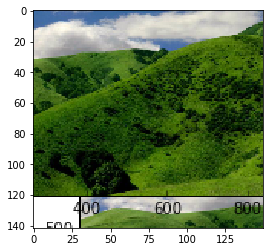

In [7]:
img=plt.imread('Unknown.png')
plt.imshow(img)

print ('image shape', img.shape)
plt.imshow(img[100:250, 100:250])

ValueError: zero-size array to reduction operation minimum which has no identity

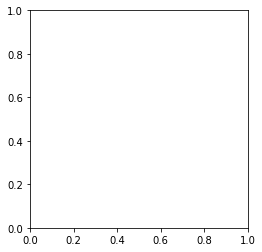